In [1]:
# import libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sqlite3 
import os 
from datetime import datetime as dt
import seaborn as sns

In [2]:
# create a connection to database.
conn = sqlite3.connect('db/mydata.db')

# load answers and merge with it answer_score and clean it

In [3]:
# query to get answers table and join to evry answer it score.
query = """
SELECT answers.*, answer_scores.score 
FROM answers
INNER JOIN answer_scores
ON answers.answers_id = answer_scores.answers_id
"""

In [4]:
# load the selected data related to answers into data frame.
answers = pd.read_sql(query, conn)

In [5]:
answers['answers_date_added'] = pd.to_datetime(answers['answers_date_added'])

In [6]:
answers['answers_date_added'] = answers['answers_date_added'].dt.tz_localize(None)

In [7]:
# display the first 5 rows of answers to check if getting data done.
answers.head()

,answers_id,author_id,question_id,answers_date_added,answers_body,score
0,4e5f01128cae4f6d8fd697cec5dca60c,36ff3b3666df400f956f8335cf53e09e,332a511f1569444485cf7a7a556a5e54,2016-04-29 19:40:14,Hi!\nYou are asking a very interesting questio...,0
1,ada720538c014e9b8a6dceed09385ee3,2aa47af241bf42a4b874c453f0381bd4,eb80205482e4424cad8f16bc25aa2d9c,2018-05-01 14:19:08,Hi. I joined the Army after I attended college...,0
2,eaa66ef919bc408ab5296237440e323f,cbd8f30613a849bf918aed5c010340be,eb80205482e4424cad8f16bc25aa2d9c,2018-05-02 02:41:02,"Dear Priyanka,Greetings! I have answered this ...",0
3,1a6b3749d391486c9e371fbd1e605014,7e72a630c303442ba92ff00e8ea451df,4ec31632938a40b98909416bdd0decff,2017-05-10 19:00:47,I work for a global company who values highly ...,0
4,5229c514000446d582050f89ebd4e184,17802d94699140b0a0d2995f30c034c6,2f6a9a99d9b24e5baa50d40d0ba50a75,2017-10-13 22:07:33,I agree with Denise. Every single job I've had...,0


In [8]:
# show shape of answers to know the size of data we working with.
answers.shape

(51106, 6)

In [9]:
# get answers info to know more about answers data.
answers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51106 entries, 0 to 51105
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   answers_id          51106 non-null  object        
 1   author_id           51106 non-null  object        
 2   question_id         51106 non-null  object        
 3   answers_date_added  51106 non-null  datetime64[ns]
 4   answers_body        51099 non-null  object        
 5   score               51106 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 2.3+ MB


In [10]:
# check if their is any duplicates in answers.
answers.duplicated().sum()

0

In [11]:
# check if their is any missing values in answers.
answers.isnull().sum()

answers_id            0
author_id             0
question_id           0
answers_date_added    0
answers_body          7
score                 0
dtype: int64

In [12]:
# drop missing values in answers.
answers.dropna(inplace=True)
# check if the drop process done.
answers.isnull().sum()

answers_id            0
author_id             0
question_id           0
answers_date_added    0
answers_body          0
score                 0
dtype: int64

In [13]:
# recheck answers shape again.
answers.shape

(51099, 6)

In [14]:
# get summary statistics for answers setting include = 'all' to get all data summary numeric and categorical.
answers.describe(include='all')

,answers_id,author_id,question_id,answers_date_added,answers_body,score
count,51099,51099,51099,51099,51099,51099.000000
unique,51099,10161,23101,NaN,50325,NaN
top,4e5f01128cae4f6d8fd697cec5dca60c,36ff3b3666df400f956f8335cf53e09e,8eb6ba7af57846acbfec5633e537192a,NaN,"&lt;span style=""background-color: transparent;...",NaN
freq,1,1710,58,NaN,125,NaN
mean,NaN,NaN,NaN,2017-03-11 16:06:56.065226240,NaN,0.415546
min,NaN,NaN,NaN,2011-10-05 20:33:04,NaN,0.000000
25%,NaN,NaN,NaN,2016-06-11 20:29:32.500000,NaN,0.000000
50%,NaN,NaN,NaN,2017-05-10 15:50:43,NaN,0.000000
75%,NaN,NaN,NaN,2018-04-04 12:02:17.500000,NaN,1.000000
max,NaN,NaN,NaN,2019-01-31 23:47:27,NaN,30.000000


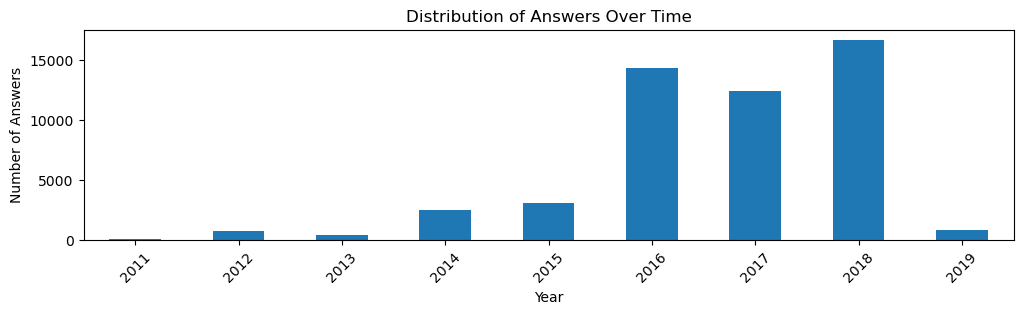

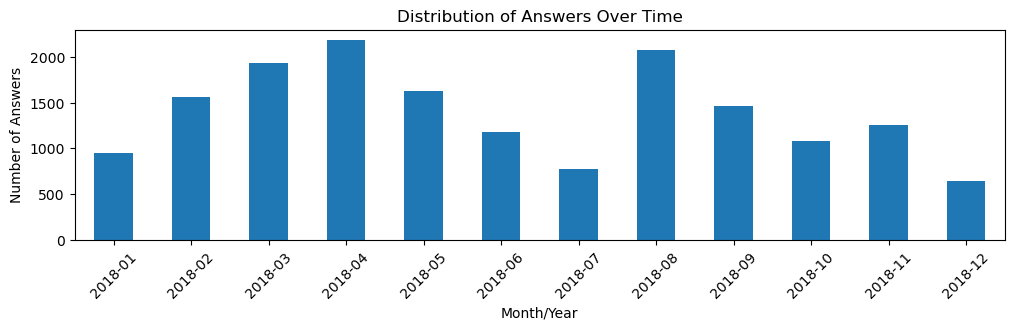

In [15]:
# Visualization 1: Distribution of Answers Over Time
plt.figure(figsize=(12,6))
plt.subplot(2,1,1)
answers['answers_date_added'].dt.to_period('Y').value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Answers Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Answers')
plt.xticks(rotation=45)
plt.show()
plt.figure(figsize=(12,6))
plt.subplot(2,1,2)
filtered_answers = answers[answers['answers_date_added'].dt.year == 2018]
filtered_answers['answers_date_added'].dt.to_period('M').value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Answers Over Time')
plt.xlabel('Month/Year')
plt.ylabel('Number of Answers')
plt.xticks(rotation=45)
plt.show()

In [16]:
# add column calculate in it the len of each answer.
answers['answers_length'] = answers['answers_body'].apply(len)

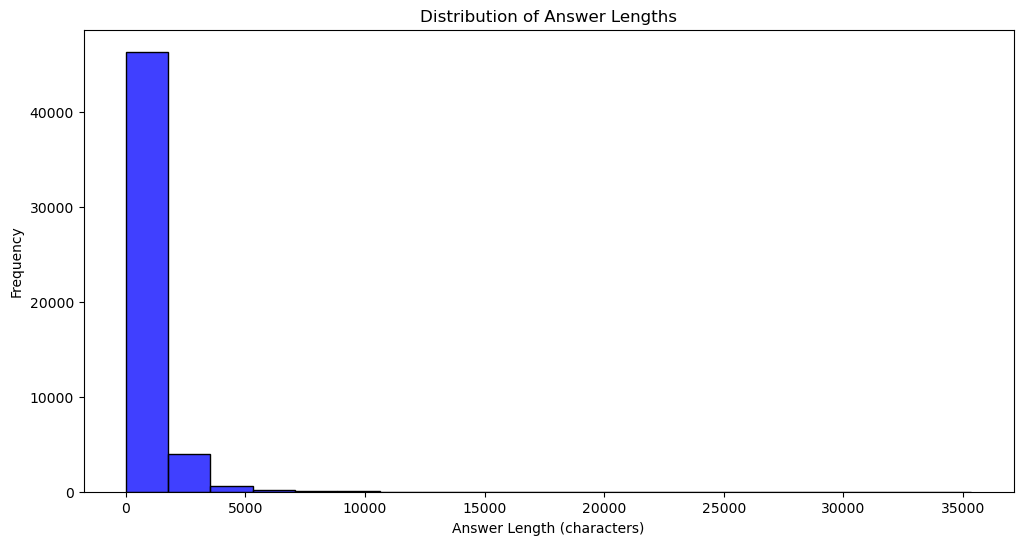

In [17]:
plt.figure(figsize=(12,6))
sns.histplot(answers['answers_length'],bins=20,color='b')
plt.title('Distribution of Answer Lengths')
plt.xlabel('Answer Length (characters)')
plt.ylabel('Frequency')
plt.show()

In [18]:
# save answers to csv file in folder of tableau  to make visualizations.
answers.to_csv('tableau/answers.csv',index=False)

# load emails and merge with it matches 

In [19]:
# show emails table information
query = "PRAGMA table_info(emails);"
emails_info = pd.read_sql(query,conn)
emails_info

,cid,name,type,notnull,dflt_value,pk
0,0,emails_id,INTEGER,0,None,0
1,1,emails_recipient_id,TEXT,0,None,0
2,2,emails_date_sent,TEXT,0,None,0
3,3,emails_frequency_level,TEXT,0,None,0


In [20]:
# show matches table iformation.
query = "PRAGMA table_info(matches)"
matches_info = pd.read_sql(query, conn)
matches_info

,cid,name,type,notnull,dflt_value,pk
0,0,emails_id,INTEGER,0,None,0
1,1,question_id,TEXT,0,None,0


In [21]:
# query to select emails and matches columns to load into dataframe.
query_1 = """
SELECT e.emails_id, e.emails_recipient_id, e.emails_date_sent, e.emails_frequency_level, m.question_id
FROM emails as e
INNER JOIN matches as m
ON e.emails_id = m.emails_id
"""

In [22]:
# load selected columns into dataframe.
emails = pd.read_sql(query_1, conn)

In [23]:
# display the first 5 rows of emails.
emails.head()

,emails_id,emails_recipient_id,emails_date_sent,emails_frequency_level,question_id
0,2337714,0c673e046d824ec0ad0ebe012a0673e4,2018-12-07 01:05:40 UTC+0000,email_notification_daily,b996a285a43e4a9aa7f111f381a7e5df
1,2336077,0c673e046d824ec0ad0ebe012a0673e4,2018-12-06 01:14:15 UTC+0000,email_notification_daily,b8c76d86086845668d52b6c481045be7
2,2314660,0c673e046d824ec0ad0ebe012a0673e4,2018-11-17 00:38:27 UTC+0000,email_notification_daily,749956b01c864e56a791710d1c4b9853
3,2312639,0c673e046d824ec0ad0ebe012a0673e4,2018-11-16 00:32:19 UTC+0000,email_notification_daily,5614d85fbbad494db3e1a1c2d1ef4ef9
4,2312639,0c673e046d824ec0ad0ebe012a0673e4,2018-11-16 00:32:19 UTC+0000,email_notification_daily,58ac65d653fe456b8a1728ee57fd861b


In [24]:
# convert emails sent time type to datetime.
emails['emails_date_sent'] = pd.to_datetime(emails['emails_date_sent'])

In [25]:
# show email information.
emails.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4316275 entries, 0 to 4316274
Data columns (total 5 columns):
 #   Column                  Dtype              
---  ------                  -----              
 0   emails_id               int64              
 1   emails_recipient_id     object             
 2   emails_date_sent        datetime64[ns, UTC]
 3   emails_frequency_level  object             
 4   question_id             object             
dtypes: datetime64[ns, UTC](1), int64(1), object(3)
memory usage: 164.7+ MB


In [26]:
# show the size of emails dataframe.
emails.shape

(4316275, 5)

In [27]:
# check for missing values.
emails.isnull().sum()

emails_id                 0
emails_recipient_id       0
emails_date_sent          0
emails_frequency_level    0
question_id               0
dtype: int64

In [28]:
# check for duplicates in emails.
emails.duplicated().sum()

0

In [29]:
# get statisticial summary for emails.
emails.describe(include='all')

,emails_id,emails_recipient_id,emails_date_sent,emails_frequency_level,question_id
count,4.316275e+06,4316275,4316275,4316275,4316275
unique,NaN,21826,NaN,3,21894
top,NaN,64a77f3d3be84ba5a71ba6081e086c3a,NaN,email_notification_daily,d9b06cd477a943b9b3821f37d64a1da3
freq,NaN,3457,NaN,3655450,2099
mean,1.478192e+06,NaN,2017-10-09 13:00:02.699494912+00:00,NaN,NaN
min,1.060000e+02,NaN,2013-11-23 00:17:42+00:00,NaN,NaN
25%,1.011924e+06,NaN,2017-01-18 23:12:51+00:00,NaN,NaN
50%,1.544656e+06,NaN,2018-02-07 03:00:35+00:00,NaN,NaN
75%,1.970642e+06,NaN,2018-06-18 00:32:19+00:00,NaN,NaN
max,2.409829e+06,NaN,2019-01-31 23:33:06+00:00,NaN,NaN


In [30]:
# display value counts of email frequency level.
emails_frequency_level_proportion = emails['emails_frequency_level'].value_counts()
emails_frequency_level_proportion

emails_frequency_level
email_notification_daily        3655450
email_notification_weekly        338632
email_notification_immediate     322193
Name: count, dtype: int64

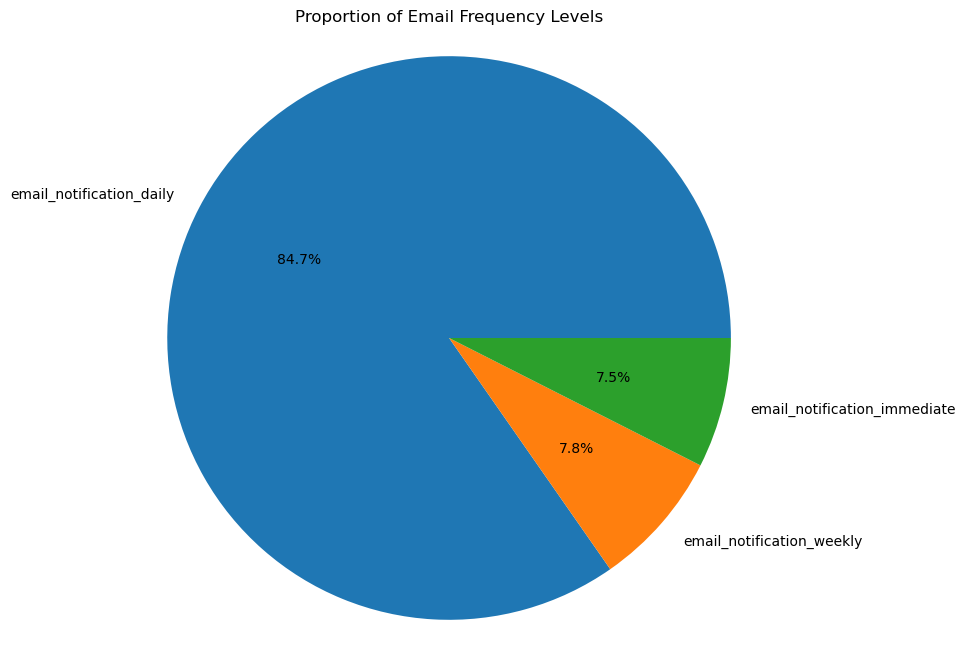

In [31]:
# plot pie chart for show the percent of emails frequwency level.
emails_frequency_level_proportion = {
    'email_notification_daily': 0.846899,
    'email_notification_weekly': 0.078455,
    'email_notification_immediate': 0.074646
}
# Extract the labels and sizes from the dictionary
labels = emails_frequency_level_proportion.keys()
sizes = emails_frequency_level_proportion.values()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Proportion of Email Frequency Levels')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [32]:
# Set the datetime as the index
emails.set_index('emails_date_sent', inplace=True)

In [33]:
# Resample the data by day to get daily email counts
daily_emails = emails.resample('D').size()

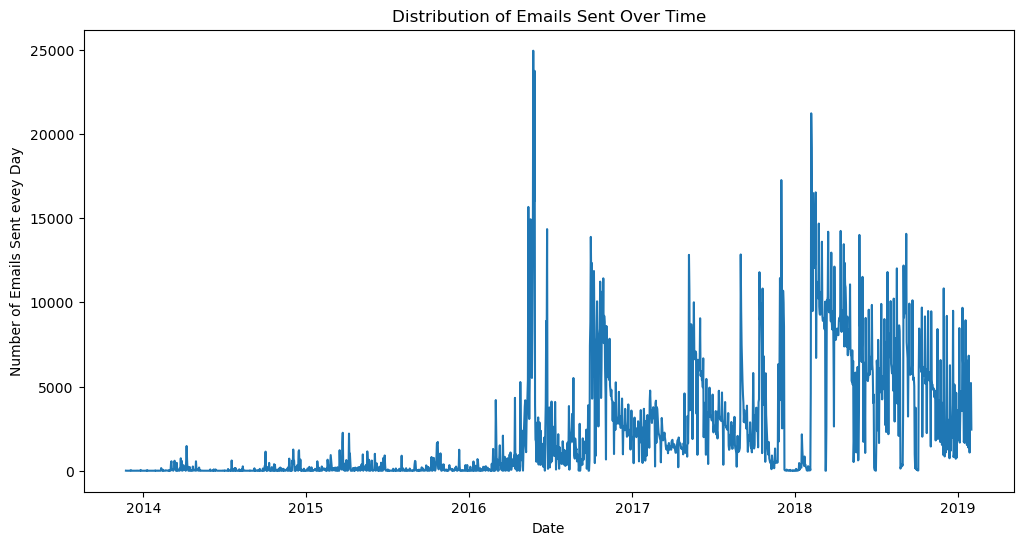

In [34]:
# Plotting the time series
plt.figure(figsize=(12, 6))
sns.lineplot(x=daily_emails.index, y=daily_emails.values)
plt.xlabel('Date')
plt.ylabel('Number of Emails Sent evey Day')
plt.title('Distribution of Emails Sent Over Time')
plt.show()

In [35]:
# save emails to csv file in folder of tableau  to make visualizations.
emails.to_csv('tableau/emails.csv', index=False)

# load and merge groups and group_membership.

In [36]:
# show groups table information
query = "PRAGMA table_info(groups);"
emails_info = pd.read_sql(query,conn)
emails_info

,cid,name,type,notnull,dflt_value,pk
0,0,group_id,TEXT,0,None,0
1,1,group_type,TEXT,0,None,0


In [37]:
# show group_memberships table information
query = "PRAGMA table_info(group_memberships);"
emails_info = pd.read_sql(query,conn)
emails_info

,cid,name,type,notnull,dflt_value,pk
0,0,group_id,TEXT,0,None,0
1,1,user_id,TEXT,0,None,0


In [38]:
query2 ="""
SELECT gm.group_id, gm.user_id, g.group_type 
FROM group_memberships as gm
JOIN groups as g
ON g.group_id = gm.group_id
"""

In [39]:
# load merged tables in to data frame.
groups = pd.read_sql(query2, conn)
groups.head()

,group_id,user_id,group_type
0,eabbdf4029734c848a9da20779637d03,9a5aead62c344207b2624dba90985dc5,youth program
1,eabbdf4029734c848a9da20779637d03,ea7122da1c7b4244a2184a4f9f944053,youth program
2,eabbdf4029734c848a9da20779637d03,cba603f34acb4a40b3ccb53fe6681b5d,youth program
3,eabbdf4029734c848a9da20779637d03,fa9a126e63714641ae0145557a390cab,youth program
4,eabbdf4029734c848a9da20779637d03,299da113c5d1420ab525106c242c9429,youth program


In [40]:
# show groups information.
groups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1038 entries, 0 to 1037
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   group_id    1038 non-null   object
 1   user_id     1038 non-null   object
 2   group_type  1038 non-null   object
dtypes: object(3)
memory usage: 24.5+ KB


In [41]:
# check for missing values.
groups.isna().sum()

group_id      0
user_id       0
group_type    0
dtype: int64

In [42]:
# check for duplicates.
groups.duplicated().sum()

1

In [43]:
# drop duplicates.
groups.drop_duplicates(inplace=True)

In [44]:
# get staistics summary.
groups.describe(include='all')

,group_id,user_id,group_type
count,1037,1037,1037
unique,46,727,7
top,f16d593910bf443598839021bbe97128,b0f6c44506444fb99e910dcc5836b5d8,youth program
freq,117,14,652


In [45]:
# groups type value counts.
groups['group_type'].value_counts()

group_type
youth program           652
cause                   232
professional network     92
club                     22
mentorship program       22
interest group           13
competition               4
Name: count, dtype: int64

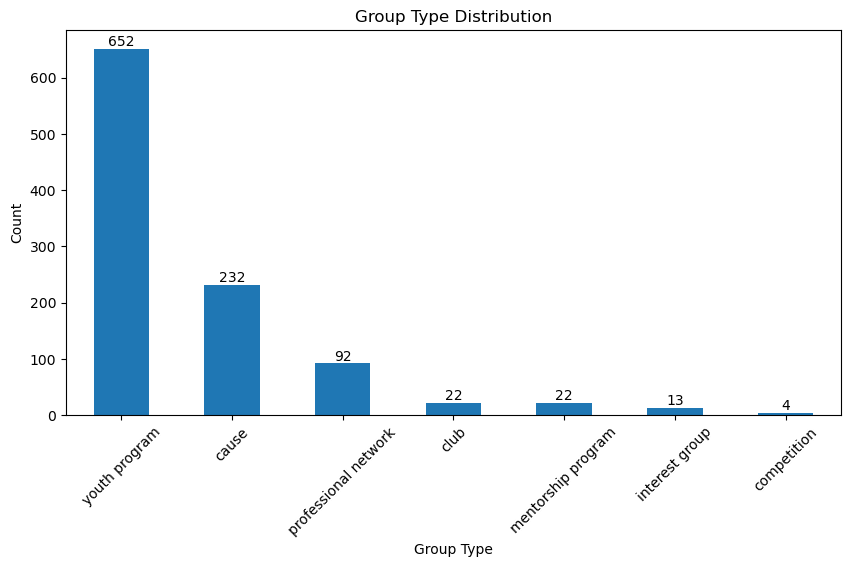

In [46]:
# plot a bar plot for groups type value counts.
plt.figure(figsize=(10,5))
ax = groups['group_type'].value_counts().plot(kind='bar')
plt.xticks(rotation=45)
# Add count labels to each bar
for p in ax.patches:
    ax.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom')
plt.xlabel('Group Type')
plt.ylabel('Count')
plt.title('Group Type Distribution')
plt.show()

In [47]:
# save groups to csv to csv file in folder of tableau  to make visualizations.
groups.to_csv('tableau/groups.csv', index=False)

# load professionals in data frame.

In [48]:
# load table professionals into data frame.
query3 = """
SELECT * 
FROM professionals
"""
professionals = pd.read_sql(query3, conn)
professionals.head()

,professionals_id,professionals_location,professionals_industry,professionals_headline,professionals_date_joined
0,68ecc66323b8418092fdd724aaf5be94,"New York, New York",Special Events,Event Hospitality & Operations Specialist,2011-12-26 05:00:00 UTC+0000
1,c79d4e4fd9af4ab7a7e6b6f433128476,"New York, New York","education, tech, media","media, technology, education",2011-12-26 05:00:00 UTC+0000
2,1e4cc96c24344c8b806c26c3e6746167,"Boston, Massachusetts",Hospitality & Consulting,Hospitality and Restaurant Consultant,2011-12-28 14:35:42 UTC+0000
3,1ec14aee9311480681dfa81b0f193de8,"Denton, Texas",Software,Google Software Engineer,2012-01-15 19:21:07 UTC+0000
4,ccad7c94952a49b9ad0fb85b09d1398d,"New York, New York",Mobile,Co-founder of mobile fashion shopping app,2012-01-23 16:54:25 UTC+0000


In [49]:
# get professionals informations.
professionals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22902 entries, 0 to 22901
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   professionals_id           22902 non-null  object
 1   professionals_location     22902 non-null  object
 2   professionals_industry     22902 non-null  object
 3   professionals_headline     22902 non-null  object
 4   professionals_date_joined  22902 non-null  object
dtypes: object(5)
memory usage: 894.7+ KB


In [50]:
# convert professionals date join to datetime. 
professionals['professionals_date_joined'] = pd.to_datetime(professionals['professionals_date_joined'])

In [51]:
# check for convertion.
professionals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22902 entries, 0 to 22901
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype              
---  ------                     --------------  -----              
 0   professionals_id           22902 non-null  object             
 1   professionals_location     22902 non-null  object             
 2   professionals_industry     22902 non-null  object             
 3   professionals_headline     22902 non-null  object             
 4   professionals_date_joined  22902 non-null  datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), object(4)
memory usage: 894.7+ KB


In [52]:
# check for missing values.
professionals.isnull().sum()

professionals_id             0
professionals_location       0
professionals_industry       0
professionals_headline       0
professionals_date_joined    0
dtype: int64

In [53]:
# check for duplicates.
professionals.duplicated().sum()

0

In [54]:
# get summary statistics for professionals.
professionals.describe(include='all')

,professionals_id,professionals_location,professionals_industry,professionals_headline,professionals_date_joined
count,22902,22902,22902,22902,22902
unique,22902,2396,2268,20320,NaN
top,68ecc66323b8418092fdd724aaf5be94,"New York, New York",Information Technology and Services,--,NaN
freq,1,1226,2074,176,NaN
mean,NaN,NaN,NaN,NaN,2017-06-03 18:58:25.000131072+00:00
min,NaN,NaN,NaN,NaN,2011-12-26 05:00:00+00:00
25%,NaN,NaN,NaN,NaN,2016-05-17 17:43:24.249999872+00:00
50%,NaN,NaN,NaN,NaN,2017-09-19 23:59:10+00:00
75%,NaN,NaN,NaN,NaN,2018-06-18 13:22:21.249999872+00:00
max,NaN,NaN,NaN,NaN,2019-01-31 23:59:09+00:00


In [55]:
# ceheck for unique values in professionals.
professionals.nunique()

professionals_id             22902
professionals_location        2396
professionals_industry        2268
professionals_headline       20320
professionals_date_joined    22874
dtype: int64

In [56]:
# get value counts for top 15 in professtionals locations.
locations_count = professionals['professionals_location'].value_counts()
top_15_locations = locations_count.head(15)
top_15_locations

professionals_location
New York, New York            1226
California, California         841
Greater New York City Area     696
Boston, Massachusetts          634
Los Angeles, California        588
Chicago, Illinois              555
Austin, Texas                  542
Atlanta, Georgia               535
Houston, Texas                 510
San Francisco Bay Area         501
Philadelphia, Pennsylvania     377
Greater Atlanta Area           372
San Francisco, California      372
Dallas/Fort Worth Area         359
Greater Los Angeles Area       347
Name: count, dtype: int64

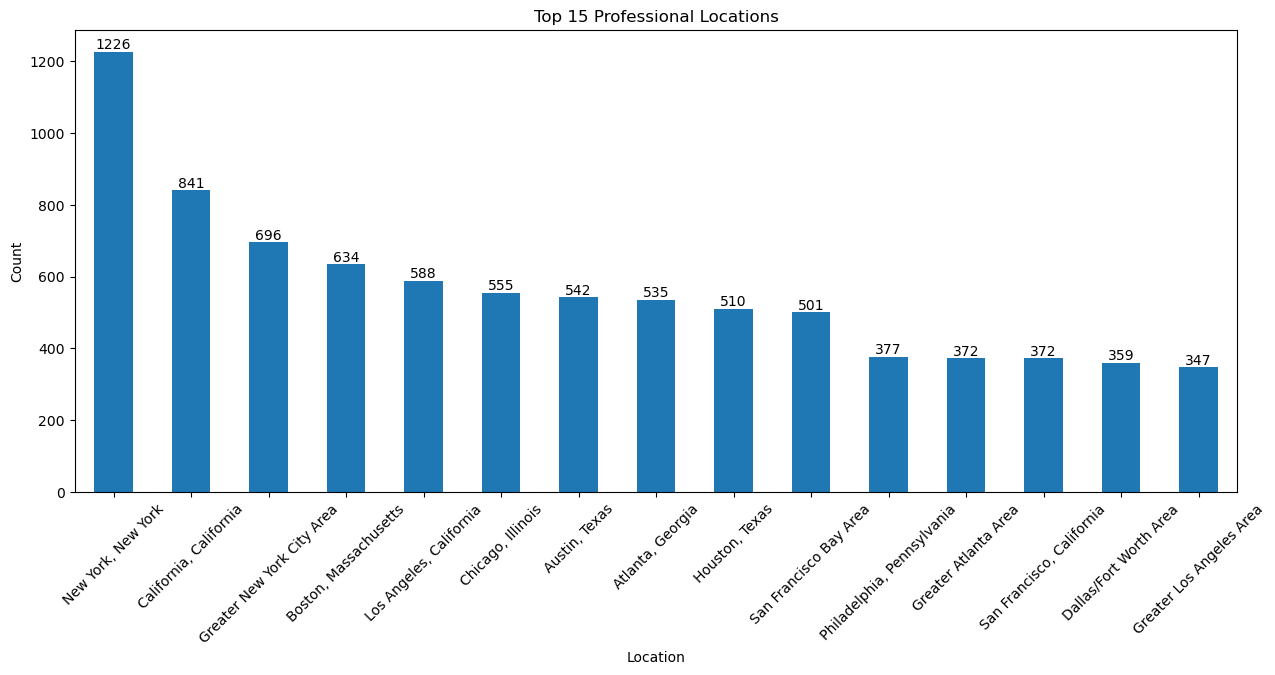

In [57]:
# plot a bar chart for locations.
plt.figure(figsize=(15,6))
ax = top_15_locations.plot(kind='bar')
plt.title('Top 15 Professional Locations')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45) # Rotates the x labels for better readability
for p in ax.patches:
    ax.annotate(f"{p.get_height()}",(p.get_x()+ p.get_width()/2., p.get_height()),
                ha='center' , va = 'bottom'
               )
plt.show()

In [58]:
# get value counts for the top 10 industry of professionals.
industry_count = professionals['professionals_industry'].value_counts()
top_10_industries = industry_count.head(10)
top_10_industries

professionals_industry
Information Technology and Services    2074
Telecommunications                     1306
Computer Software                      1249
Hospital and Health Care                827
Accounting                              767
Higher Education                        764
Financial Services                      629
Education Management                    583
Marketing and Advertising               518
Internet                                413
Name: count, dtype: int64

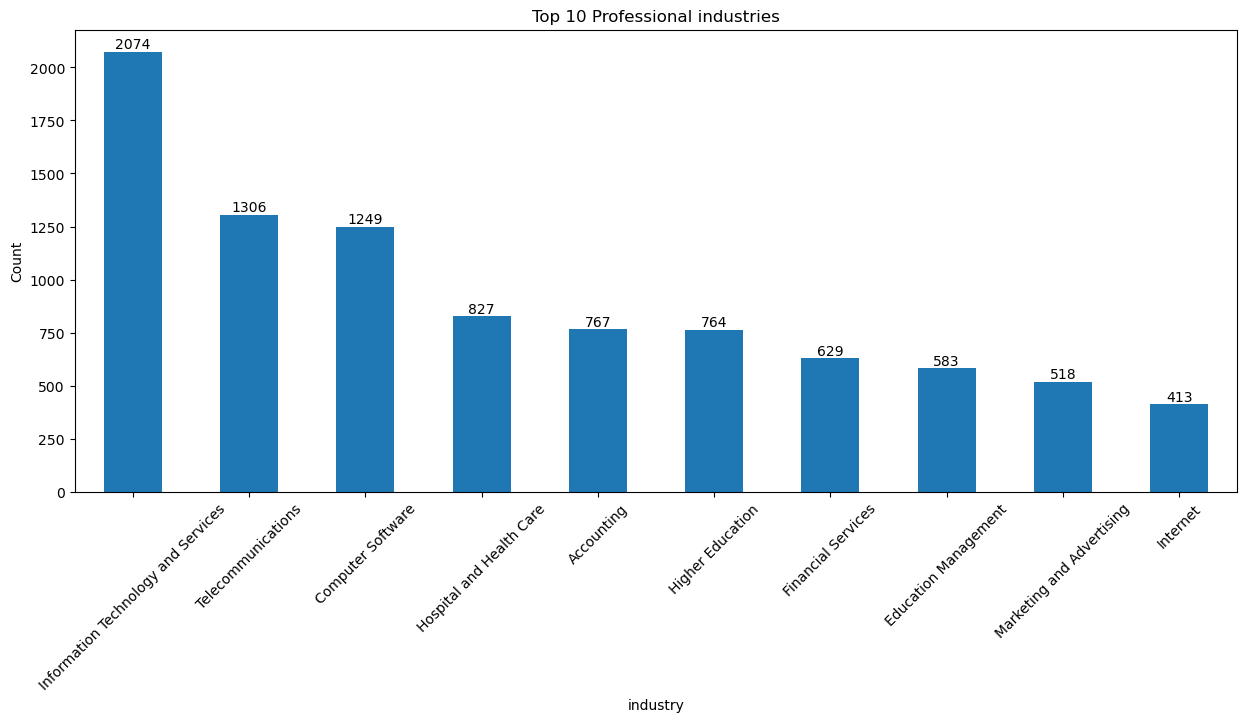

In [59]:
# plot a bar chart for top industries.
plt.figure(figsize=(15,6))
ax = top_10_industries.plot(kind='bar')
plt.title('Top 10 Professional industries')
plt.xlabel('industry')
plt.ylabel('Count')
plt.xticks(rotation=45) # Rotates the x labels for better readability
for p in ax.patches:
    ax.annotate(f"{p.get_height()}",(p.get_x()+ p.get_width()/2., p.get_height()),
                ha='center' , va = 'bottom'
               )
plt.show()

In [60]:
# get value counts for the top 10 headlines of professionals.
headlines_count = professionals['professionals_headline'].value_counts()
top_10_headlines = headlines_count.head(10)
top_10_headlines

professionals_headline
--                            176
Assurance Associate at PwC     87
Software Engineer              51
Senior Associate at PwC        43
Biomedical Engineer            38
Tax Associate at PwC           37
Attorney                       34
Mechanical Engineer            34
Registered Nurse               32
Associate at PwC               28
Name: count, dtype: int64

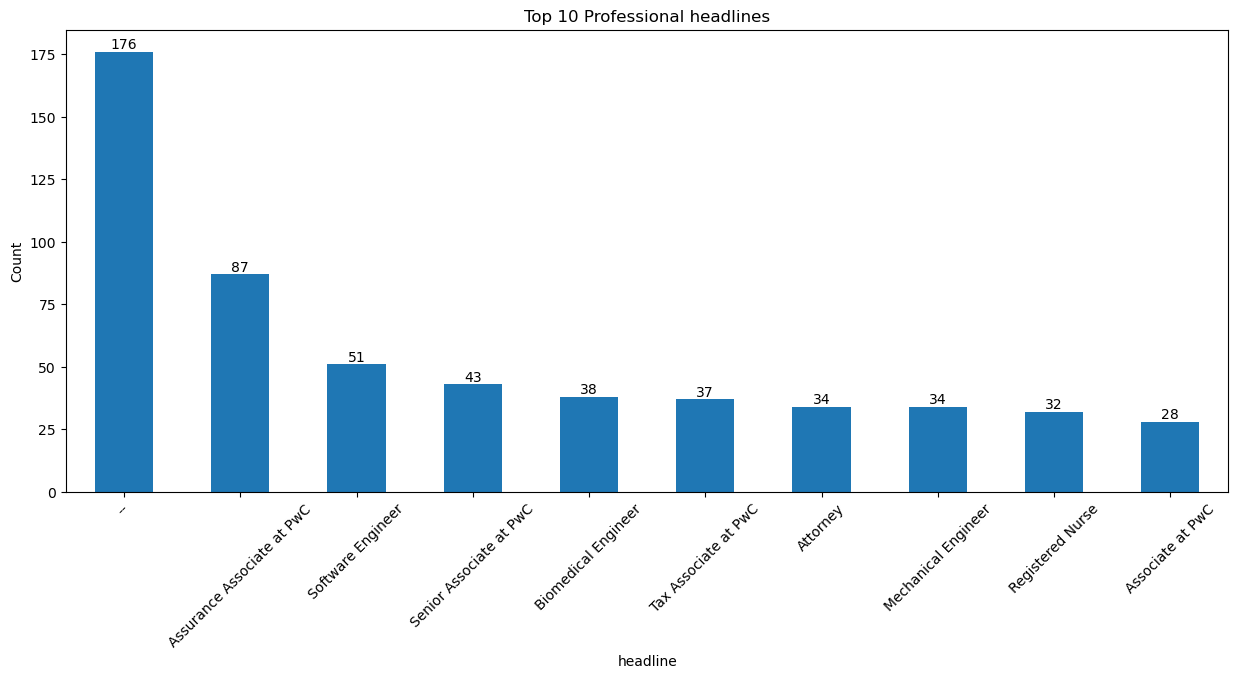

In [61]:
# plot a bar chart for top headlines.
plt.figure(figsize=(15,6))
ax = top_10_headlines.plot(kind='bar')
plt.title('Top 10 Professional headlines')
plt.xlabel('headline')
plt.ylabel('Count')
plt.xticks(rotation=45) # Rotates the x labels for better readability
for p in ax.patches:
    ax.annotate(f"{p.get_height()}",(p.get_x()+ p.get_width()/2., p.get_height()),
                ha='center' , va = 'bottom'
               )
plt.show()

In [62]:
# save professionals into csv in tableau folder to visualizations.
professionals.to_csv('tableau/professionals.csv', index=False)

# load questions and merge with it quetion score.
to make every question get it score for best analysis.

In [63]:
# show questions table information
query = "PRAGMA table_info(questions);"
questions_info = pd.read_sql(query,conn)
questions_info

,cid,name,type,notnull,dflt_value,pk
0,0,question_id,TEXT,0,None,0
1,1,author_id,TEXT,0,None,0
2,2,questions_date_added,TEXT,0,None,0
3,3,questions_title,TEXT,0,None,0
4,4,questions_body,TEXT,0,None,0


In [64]:
# show question score table information
query = "PRAGMA table_info(question_scores);"
questions_info = pd.read_sql(query,conn)
questions_info

,cid,name,type,notnull,dflt_value,pk
0,0,question_id,TEXT,0,None,0
1,1,score,INTEGER,0,None,0


In [65]:
# query to join questions and question scores tables.
query4 = """
SELECT q.question_id, q.author_id, q.questions_date_added, q.questions_title,q.questions_body , qs.score
FROM questions as q 
INNER JOIN question_scores as qs
ON q.question_id = qs.question_id	
"""

In [66]:
# load the joined tables into data frame.
questions = pd.read_sql(query4, conn)
questions.head()

,question_id,author_id,questions_date_added,questions_title,questions_body,score
0,332a511f1569444485cf7a7a556a5e54,8f6f374ffd834d258ab69d376dd998f5,2016-04-26 11:14:26 UTC+0000,Teacher career question,What is a maths teacher? what is a ma...,1
1,eb80205482e4424cad8f16bc25aa2d9c,acccbda28edd4362ab03fb8b6fd2d67b,2016-05-20 16:48:25 UTC+0000,I want to become an army officer. What can I d...,I am Priyanka from Bangalore . Now am in 10th ...,5
2,4ec31632938a40b98909416bdd0decff,f2c179a563024ccc927399ce529094b5,2017-02-08 19:13:38 UTC+0000,Will going abroad for your first job increase ...,I'm planning on going abroad for my first job....,2
3,2f6a9a99d9b24e5baa50d40d0ba50a75,2c30ffba444e40eabb4583b55233a5a4,2017-09-01 14:05:32 UTC+0000,To become a specialist in business management...,i hear business management is a hard way to ge...,2
4,5af8880460c141dbb02971a1a8369529,aa9eb1a2ab184ebbb00dc01ab663428a,2017-09-01 02:36:54 UTC+0000,Are there any scholarships out there for stude...,I'm trying to find scholarships for first year...,2


In [67]:
# get questions informations.
questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23928 entries, 0 to 23927
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   question_id           23928 non-null  object
 1   author_id             23928 non-null  object
 2   questions_date_added  23928 non-null  object
 3   questions_title       23928 non-null  object
 4   questions_body        23928 non-null  object
 5   score                 23928 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 1.1+ MB


In [68]:
# convert questions date added to datetime.
questions['questions_date_added'] = pd.to_datetime(questions['questions_date_added'])

In [69]:
# check for missing values. 
questions.isnull().sum()

question_id             0
author_id               0
questions_date_added    0
questions_title         0
questions_body          0
score                   0
dtype: int64

In [70]:
# check for duplicates in questions.
questions.duplicated().sum()

0

In [71]:
# get statistics summary for questions.
questions.describe(include='all')

,question_id,author_id,questions_date_added,questions_title,questions_body,score
count,23928,23928,23928,23928,23928,23928.000000
unique,23928,12328,NaN,23736,23678,NaN
top,332a511f1569444485cf7a7a556a5e54,2fe767de78fa4dfd83f0021cf7712064,NaN,How do I become an IAS officer?,Accounting student at Towson university #acco...,NaN
freq,1,93,NaN,6,16,NaN
mean,NaN,NaN,2017-01-07 06:44:34.797768192+00:00,NaN,NaN,2.900326
min,NaN,NaN,2011-09-27 15:23:17+00:00,NaN,NaN,0.000000
25%,NaN,NaN,2016-05-16 19:56:57+00:00,NaN,NaN,1.000000
50%,NaN,NaN,2016-10-31 22:36:06.500000+00:00,NaN,NaN,2.000000
75%,NaN,NaN,2018-01-24 22:04:30.500000+00:00,NaN,NaN,3.000000
max,NaN,NaN,2019-01-31 22:32:00+00:00,NaN,NaN,125.000000


In [72]:
# get value counts for the top 10 question title in questions.
title_count = questions['questions_title'].value_counts()
top_10_titles = title_count.head(10)
top_10_titles

questions_title
How do I become an IAS officer?                      6
engineering                                          4
Do you like what you do for your job?                4
How do I become a software engineer?                 4
How do I become a singer?                            4
What is the most difficult part of being a nurse?    4
Engineering                                          4
What should I major in?                              4
How do I become a scientist?                         4
How do I become a bank manager?                      4
Name: count, dtype: int64

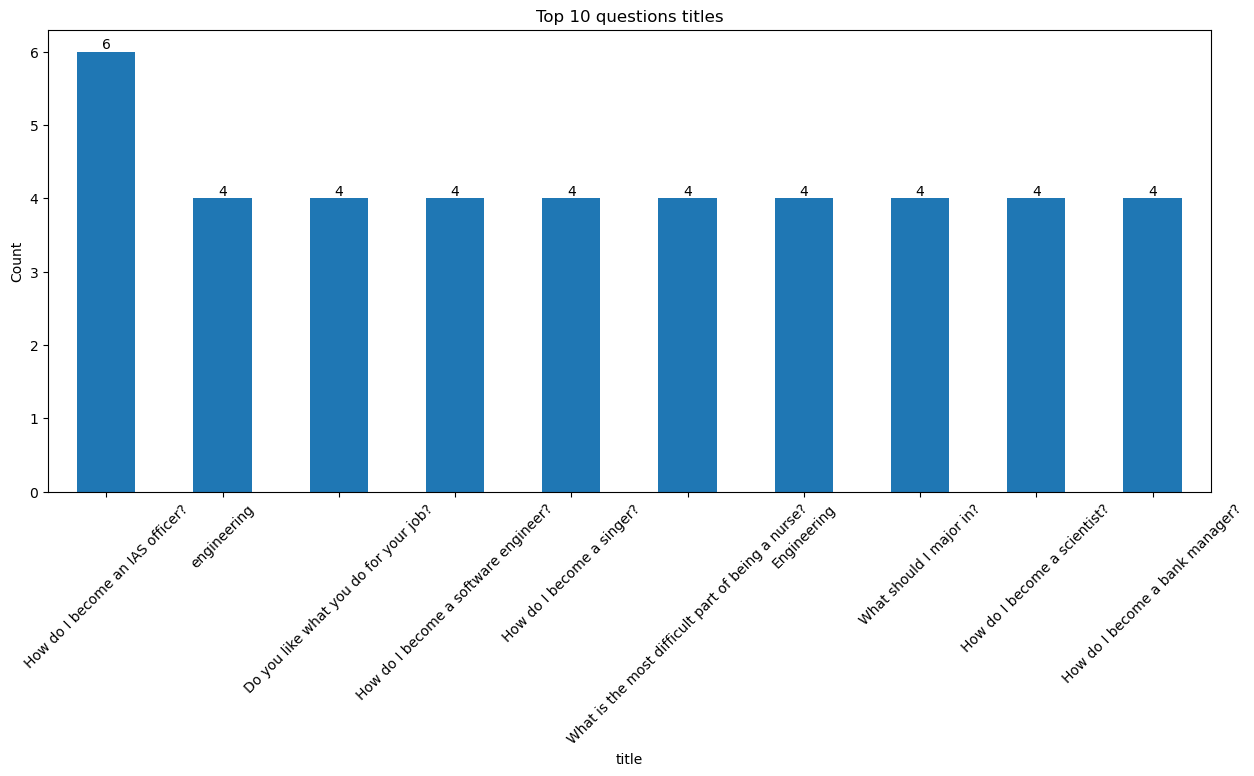

In [73]:
# plot a bar chart for top headlines.
plt.figure(figsize=(15,6))
ax = top_10_titles.plot(kind='bar')
plt.title('Top 10 questions titles')
plt.xlabel('title')
plt.ylabel('Count')
plt.xticks(rotation=45) # Rotates the x labels for better readability
for p in ax.patches:
    ax.annotate(f"{p.get_height()}",(p.get_x()+ p.get_width()/2., p.get_height()),
                ha='center' , va = 'bottom'
               )
plt.show()

In [74]:
# save questions to csv in tableau to visualizations.
questions.to_csv('tableau/questions.csv',index=False)

# load school_memberships to data frame.

In [75]:
# load school membershipe table into data frame.
query5 = """SELECT *  FROM school_memberships"""
school_memberships = pd.read_sql(query5, conn)
school_memberships.head()

,school_id,user_id
0,197406,23dce13ca6164a73aec7a3cd56a4884d
1,197398,23dce13ca6164a73aec7a3cd56a4884d
2,199821,23dce13ca6164a73aec7a3cd56a4884d
3,186239,9c5803ae43ca4cf6b27ea85871625116
4,182063,9c5803ae43ca4cf6b27ea85871625116


In [76]:
# get school memberships informations.
school_memberships.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5638 entries, 0 to 5637
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   school_id  5638 non-null   int64 
 1   user_id    5638 non-null   object
dtypes: int64(1), object(1)
memory usage: 88.2+ KB


In [77]:
# check for duplicates.
school_memberships.duplicated().sum()

224

In [78]:
# drop duplicates.
school_memberships.drop_duplicates(inplace=True)

In [79]:
# recheck for duplicates.
school_memberships.duplicated().sum()

0

In [80]:
# get statistics summary.
school_memberships.describe(include='all')

,school_id,user_id
count,5414.000000,5414
unique,NaN,3181
top,NaN,a1246930dc4944ae840cd7c25a34c9a7
freq,NaN,20
mean,168048.421869,NaN
std,47221.416662,NaN
min,69421.000000,NaN
25%,133412.750000,NaN
50%,196977.000000,NaN
75%,198800.750000,NaN


In [81]:
# save school memberships to scv in tableau for visualizations.
school_memberships.to_csv('tableau/school_memberships.csv',index=False)

# load students into data frame.

In [82]:
# load students table into data frame.
query6 = """ SELECT * FROM students"""
students = pd.read_sql(query6, conn)
students.head()

,students_id,students_location,students_date_joined
0,9658267bc2564a85bad1e802de5fb597,"Wayne, Pennsylvania",2012-01-01 05:00:00 UTC+0000
1,d49795757f274dd690bdce3936edea20,"New York, New York",2012-01-01 05:00:00 UTC+0000
2,fae3c431698a418882c4204e5f3ee244,"Lakewood, Ohio",2012-01-01 05:00:00 UTC+0000
3,2e67080928c74a4d863b2bcc60921152,"New York, New York",2012-01-01 05:00:00 UTC+0000
4,2e7d1b7f1d474530b8114ab72686726f,"London, Ontario, Canada",2012-01-01 05:00:00 UTC+0000


In [83]:
# convert students date join to datetime.
students['students_date_joined'] = pd.to_datetime(students['students_date_joined'])

In [84]:
# grt students informations.
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28938 entries, 0 to 28937
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   students_id           28938 non-null  object             
 1   students_location     28938 non-null  object             
 2   students_date_joined  28938 non-null  datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), object(2)
memory usage: 678.4+ KB


In [85]:
# check for duplicates in students.
students.duplicated().sum()

0

In [86]:
#get statistical summary for students.
students.describe(include='all')

,students_id,students_location,students_date_joined
count,28938,28938,28938
unique,28938,5480,NaN
top,9658267bc2564a85bad1e802de5fb597,"New York, New York",NaN
freq,1,1313,NaN
mean,NaN,NaN,2016-12-27 02:47:24.699979264+00:00
min,NaN,NaN,2012-01-01 05:00:00+00:00
25%,NaN,NaN,2016-05-15 13:00:19.249999872+00:00
50%,NaN,NaN,2016-10-27 02:27:25+00:00
75%,NaN,NaN,2018-01-16 15:34:01+00:00
max,NaN,NaN,2019-01-31 22:29:57+00:00


In [87]:
# get value counts for top 15 in students locations.
location_count = students['students_location'].value_counts()
top_15_location = location_count.head(15)
top_15_location

students_location
New York, New York             1313
Bengaluru, Karnataka, India     890
Los Angeles, California         663
Hyderabad, Telangana, India     597
Boston, Massachusetts           557
San Francisco, California       550
San Jose, California            548
Houston, Texas                  476
Chennai, Tamil Nadu, India      437
Chicago, Illinois               344
Oakland, California             261
San Antonio, Texas              202
Dallas, Texas                   197
Owensboro, Kentucky             196
Providence, Rhode Island        187
Name: count, dtype: int64

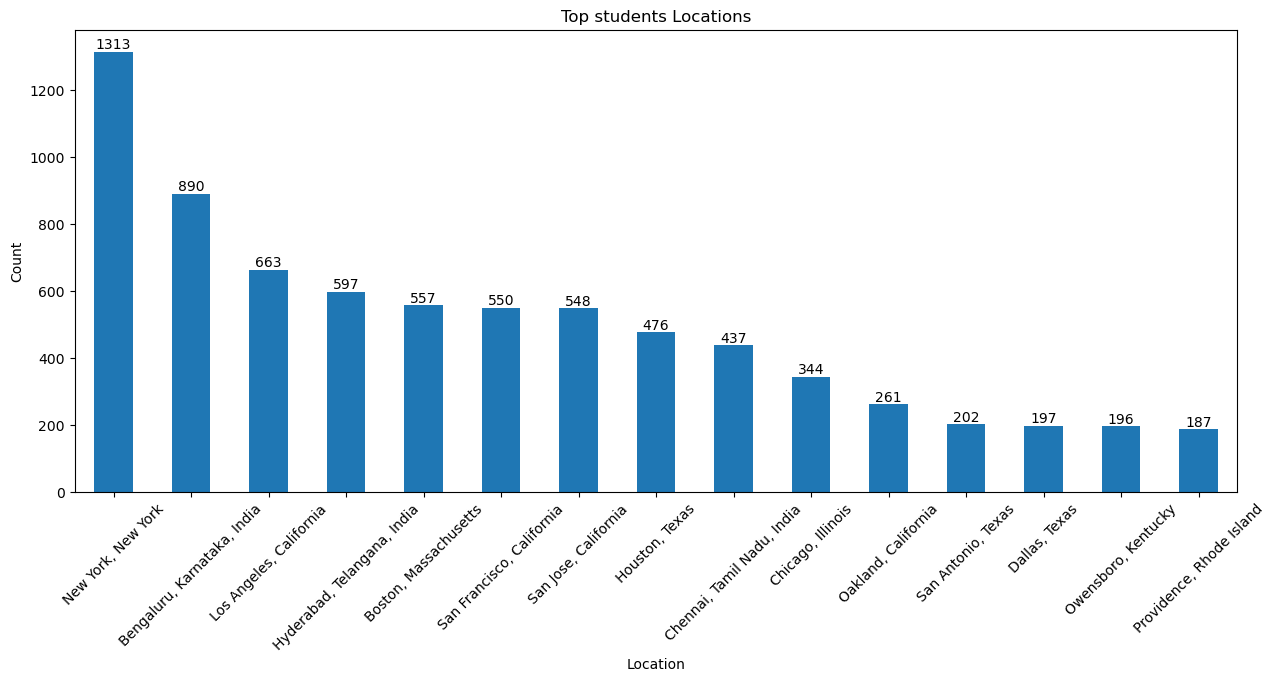

In [88]:
# plot a bar chart for locations.
plt.figure(figsize=(15,6))
ax = top_15_location.plot(kind='bar')
plt.title('Top students Locations')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45) # Rotates the x labels for better readability
for p in ax.patches:
    ax.annotate(f"{p.get_height()}",(p.get_x()+ p.get_width()/2., p.get_height()),
                ha='center' , va = 'bottom'
               )
plt.show()

In [89]:
# save students into csv in tableau for visualizations.
students.to_csv('tableau/students.csv',index=False)

# load tags, tag_question, and tag_users

In [90]:
# laod tags table.
query8 ="SELECT * FROM tags"
tags = pd.read_sql(query8,conn)
tags.head()

,tag_id,tag_name
0,27490,college
1,461,computer-science
2,593,computer-software
3,27292,business
4,18217,doctor


In [91]:
# get tags informations.
tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16268 entries, 0 to 16267
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   tag_id    16268 non-null  int64 
 1   tag_name  16268 non-null  object
dtypes: int64(1), object(1)
memory usage: 254.3+ KB


In [92]:
# check for duplicates.
tags.duplicated().sum()

0

In [93]:
# get statistical summary.
tags.describe(include='all')

,tag_id,tag_name
count,16268.000000,16268
unique,NaN,16268
top,NaN,college
freq,NaN,1
mean,28511.771207,NaN
std,8421.665899,NaN
min,27.000000,NaN
25%,21710.750000,NaN
50%,31101.500000,NaN
75%,35207.250000,NaN


In [94]:
# load tag_question in to data frame.
query9 = "SELECT * FROM tag_questions"
tag_questions = pd.read_sql(query9,conn)
tag_questions.head()

,tag_id,question_id
0,28930,cb43ebee01364c68ac61d347a393ae39
1,28930,47f55e85ce944242a5a347ab85a8ffb4
2,28930,ccc30a033a0f4dfdb2eb987012f25792
3,28930,e30b274e48d741f7bf50eb5e7171a3c0
4,28930,3d22742052df4989b311b4195cbb0f1a


In [95]:
# get informations.
tag_questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76553 entries, 0 to 76552
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   tag_id       76553 non-null  int64 
 1   question_id  76553 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.2+ MB


In [96]:
# check for missing values.
tag_questions.isnull().sum()

tag_id         0
question_id    0
dtype: int64

In [97]:
# check for duplicates.
tag_questions.duplicated().sum()

0

In [98]:
# get summary.
tag_questions.describe(include='all')

,tag_id,question_id
count,76553.000000,76553
unique,NaN,23288
top,NaN,e79bf4570af646d5892cf42b031c2a52
freq,NaN,54
mean,17289.690763,NaN
std,10308.915329,NaN
min,27.000000,NaN
25%,11165.000000,NaN
50%,18360.000000,NaN
75%,26420.000000,NaN


In [99]:
# load tag users into data frame.
query10 = "SELECT * FROM tag_users"
tag_users = pd.read_sql(query10,conn)
tag_users.head()

,tag_id,user_id
0,593,c72ab38e073246e88da7e9a4ec7a4472
1,1642,8db519781ec24f2e8bdc67c2ac53f614
2,638,042d2184ee3e4e548fc3589baaa69caf
3,11093,c660bd0dc1b34224be78a58aa5a84a63
4,21539,8ce1dca4e94240239e4385ed22ef43ce


In [100]:
# get info 
tag_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136663 entries, 0 to 136662
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   tag_id   136663 non-null  int64 
 1   user_id  136663 non-null  object
dtypes: int64(1), object(1)
memory usage: 2.1+ MB


In [101]:
# check for missing values.
tag_users.isnull().sum()

tag_id     0
user_id    0
dtype: int64

In [102]:
# check for duplicates.
tag_users.duplicated().sum()

756

In [103]:
# drop duplicates.
tag_users.drop_duplicates(inplace=True)

In [104]:
# get summary 
tag_users.describe(include='all')

,tag_id,user_id
count,135907.000000,135907
unique,NaN,30202
top,NaN,b3525548bad243cb9a437a0bf5f60eb9
freq,NaN,82
mean,19025.841097,NaN
std,8984.541164,NaN
min,27.000000,NaN
25%,18070.000000,NaN
50%,18814.000000,NaN
75%,24217.500000,NaN


In [105]:
# save tags, tag_questions, and tag_users to csv in tableau for visualization.
tags.to_csv('tableau/tags.csv',index=False)
tag_questions.to_csv('tableau/tag_questions.csv',index=False)
tag_users.to_csv('tableau/tag_users.csv',index=False)

# load comments into data frame.

In [106]:
# show question score table information
query = "PRAGMA table_info(comments);"
comments_info = pd.read_sql(query,conn)
comments_info

,cid,name,type,notnull,dflt_value,pk
0,0,comments_id,TEXT,0,None,0
1,1,author_id,TEXT,0,None,0
2,2,parent_content_id,TEXT,0,None,0
3,3,comments_date_added,TEXT,0,None,0
4,4,comments_body,TEXT,0,None,0


In [107]:
query10 = "SELECT* FROM comments"
comments = pd.read_sql(query10,conn)
comments.head()

,comments_id,author_id,parent_content_id,comments_date_added,comments_body
0,f30250d3c2ca489db1afa9b95d481e08,9fc88a7c3323466dbb35798264c7d497,b476f9c6d9cd4c50a7bacdd90edd015a,2019-01-31 23:39:40 UTC+0000,"First, you speak to recruiters. They are train..."
1,ca9bfc4ba9464ea383a8b080301ad72c,de2415064b9b445c8717425ed70fd99a,ef4b6ae24d1f4c3b977731e8189c7fd7,2019-01-31 20:30:47 UTC+0000,Most large universities offer study abroad pro...
2,c354f6e33956499aa8b03798a60e9386,6ed20605002a42b0b8e3d6ac97c50c7f,ca7a9d7a95df471c816db82ee758f57d,2019-01-31 18:44:04 UTC+0000,"First, I want to put you at ease that the oppo..."
3,73a6223948714c5da6231937157e4cb7,d02f6d9faac24997a7003a59e5f34bd3,c7a88aa76f5f49b0830bfeb46ba17e4d,2019-01-31 17:53:28 UTC+0000,Your question submission was great! I just wan...
4,55a89a9061d44dd19569c45f90a22779,e78f75c543e84e1c94da1801d8560f65,c7a88aa76f5f49b0830bfeb46ba17e4d,2019-01-31 14:51:53 UTC+0000,Thank you. I'm new to this site. I'm sorry if ...


In [108]:
# convert comments date added to date time
comments['comments_date_added'] = pd.to_datetime(comments['comments_date_added'])

In [109]:
# get comments informations.
comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14962 entries, 0 to 14961
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   comments_id          14962 non-null  object             
 1   author_id            14962 non-null  object             
 2   parent_content_id    14962 non-null  object             
 3   comments_date_added  14962 non-null  datetime64[ns, UTC]
 4   comments_body        14962 non-null  object             
dtypes: datetime64[ns, UTC](1), object(4)
memory usage: 584.6+ KB


In [110]:
# check for missing values.
comments.isnull().sum()

comments_id            0
author_id              0
parent_content_id      0
comments_date_added    0
comments_body          0
dtype: int64

In [111]:
# check for duplicates.
comments.duplicated().sum()

0

In [112]:
# get summary 
comments.describe(include='all')

,comments_id,author_id,parent_content_id,comments_date_added,comments_body
count,14962,14962,14962,14962,14962
unique,14962,4230,9923,NaN,11963
top,f30250d3c2ca489db1afa9b95d481e08,36ff3b3666df400f956f8335cf53e09e,4c6ae4bd2136472899c15b798eb9d3df,NaN,Thank you!
freq,1,317,30,NaN,388
mean,NaN,NaN,NaN,2016-07-31 10:18:19.175778560+00:00,NaN
min,NaN,NaN,NaN,2011-10-18 17:26:28+00:00,NaN
25%,NaN,NaN,NaN,2015-12-23 17:03:23.249999872+00:00,NaN
50%,NaN,NaN,NaN,2016-06-27 10:34:19+00:00,NaN
75%,NaN,NaN,NaN,2017-07-19 15:46:02.750000128+00:00,NaN
max,NaN,NaN,NaN,2019-01-31 23:39:40+00:00,NaN


In [113]:
# save comments to csv in tableau for visualization.
comments.to_csv('tableau/comments.csv',index=False)